## Setup & Load Data

In [116]:
import tensorflow as tf
import os

In [117]:
gpus = tf.config.experimental.list_physical_devices("GPU")
gpus

[]

In [118]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [119]:
for gpu in gpus:
    # Avoid out of memory errors by setting GPU Mem Consumption Limit
        try:
            tf.config.experimental.set_memory_growth(gpu, True)
        except:
            print("Required hardware not detected!")

In [120]:
img = cv2.imread(os.path.join('data', 'happy' , "35438_hd.jpg"))
img.shape

(649, 1240, 3)

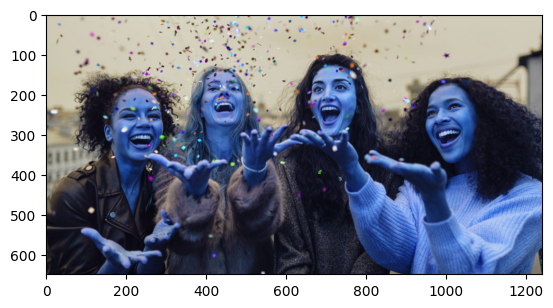

In [121]:
plt.imshow(img)

In [122]:
data_dir = "data"

In [123]:
os.listdir(data_dir)

['happy', 'sad']

In [124]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [125]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        #print(image_path)
        try:
            #img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            #print("Tip = " + tip)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Invalid image: {}".format(image_path))
        
            

## Load Data

In [126]:
import numpy as np


In [127]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 322 files belonging to 2 classes.


In [128]:
data_iterator = data.as_numpy_iterator()

In [129]:
batch = data_iterator.next()

In [130]:
len(batch) # contains images and labels (classes)

2

In [131]:
batch[0].shape

(32, 256, 256, 3)

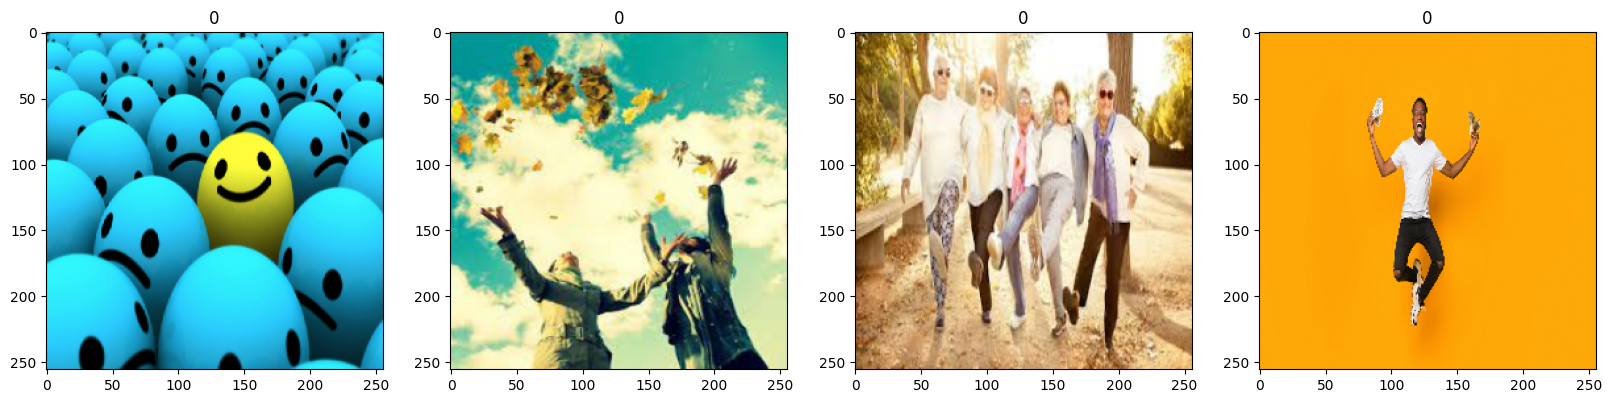

In [132]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing

In [133]:
# scale data
data = data.map(lambda x,y: (x/255, y))

In [134]:
scaled_iterator = data.as_numpy_iterator()

In [135]:
batch = scaled_iterator.next()

In [136]:
batch[0].max()

1.0

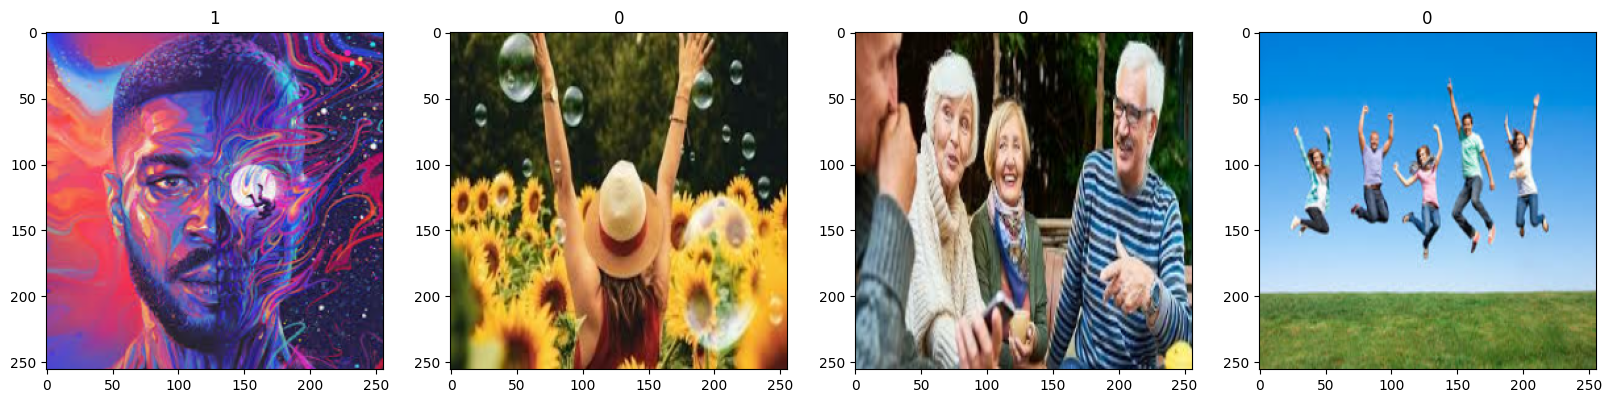

In [137]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [138]:
train_size = int(len(data) * .7) #60 % is for training
val_size = (int(len(data) * .2)) + 1
test_size = (int(len(data)*.1)) + 1
val_size

3

In [139]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## Build Deep Learning Model

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [141]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation = "relu", input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [142]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [143]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

## Train

In [144]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [145]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 9s 781ms/step - loss: 0.7449 - accuracy: 0.6652 - val_loss: 0.5805 - val_accuracy: 0.6979
Epoch 2/20
7/7 [==============================] - 7s 784ms/step - loss: 0.5802 - accuracy: 0.7054 - val_loss: 0.5545 - val_accuracy: 0.7083
Epoch 3/20
7/7 [==============================] - 8s 878ms/step - loss: 0.5535 - accuracy: 0.7098 - val_loss: 0.5316 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 7s 710ms/step - loss: 0.5047 - accuracy: 0.7723 - val_loss: 0.3572 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 8s 767ms/step - loss: 0.5008 - accuracy: 0.7411 - val_loss: 0.4519 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 8s 909ms/step - loss: 0.3764 - accuracy: 0.8259 - val_loss: 0.2883 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 7s 726ms/step - loss: 0.3276 - accuracy: 0.8661 - val_loss: 0.2504 - val_accuracy: 0.9271
Epoch 8/20
7/7 [====

In [146]:
hist.history

{'loss': [0.7449061274528503,
  0.5802117586135864,
  0.5534970164299011,
  0.5046581625938416,
  0.5007546544075012,
  0.3764190673828125,
  0.3275509774684906,
  0.28346744179725647,
  0.24097271263599396,
  0.2447989284992218,
  0.22618211805820465,
  0.23825158178806305,
  0.16246235370635986,
  0.13818632066249847,
  0.14467744529247284,
  0.09522182494401932,
  0.0498332679271698,
  0.0792282447218895,
  0.05490922927856445,
  0.08768490701913834],
 'accuracy': [0.6651785969734192,
  0.7053571343421936,
  0.7098214030265808,
  0.7723214030265808,
  0.7410714030265808,
  0.8258928656578064,
  0.8660714030265808,
  0.8928571343421936,
  0.9107142686843872,
  0.9151785969734192,
  0.9151785969734192,
  0.9151785969734192,
  0.9419642686843872,
  0.9642857313156128,
  0.9642857313156128,
  0.9776785969734192,
  0.9776785969734192,
  0.9821428656578064,
  0.9910714030265808,
  0.9776785969734192],
 'val_loss': [0.5805494785308838,
  0.5544995665550232,
  0.531578004360199,
  0.3571773

## Plot performance

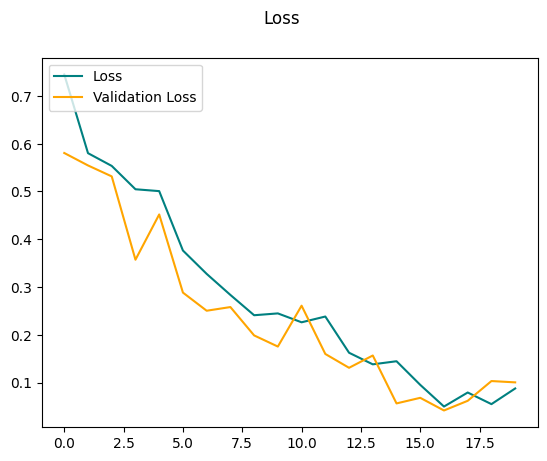

In [147]:
# Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'Loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'Validation Loss')
plt.suptitle('Loss')
plt.legend(loc = "upper left")

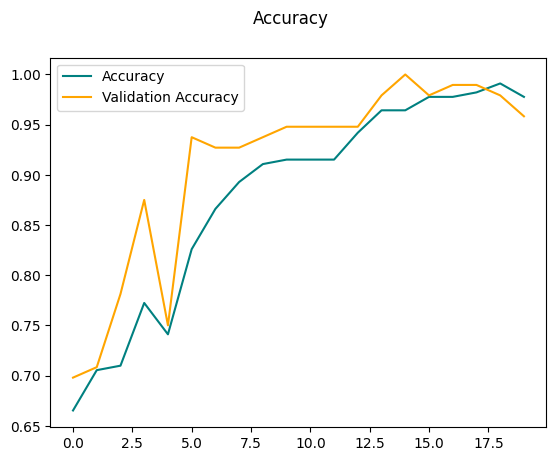

In [148]:
# Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'Validation Accuracy')
plt.suptitle('Accuracy')
plt.legend(loc = "upper left")

## Evaluate performance on test partition

In [149]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [150]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [151]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 177ms/step


In [152]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.0, Recall: 0.0, Accuracy: 0.5


## Test on new image

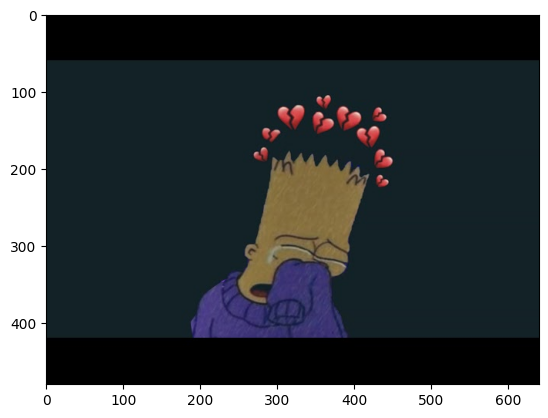

In [153]:
img = cv2.imread("sad_test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

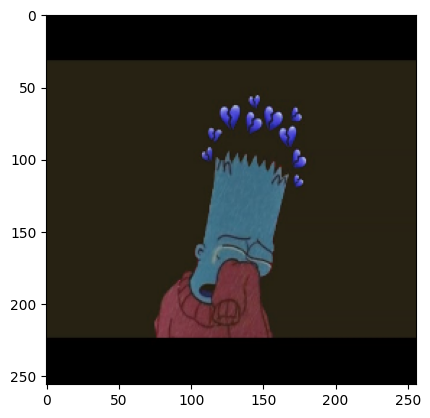

In [154]:
# resize image for CNN
resized = tf.image.resize(img, (256, 256))
plt.imshow(resized.numpy().astype(int))

In [155]:
yhat = model.predict(np.expand_dims(resized/255, 0))
if yhat > 0.5:
    print('Predicted class is Sad' + "  yhat is  " + str(yhat))
else:
    print("Predicted class is Happy"  + "  yhat is  " + str(yhat))

1/1 [==============================] - 0s 38ms/step
Predicted class is Sad  yhat is  [[0.9974414]]


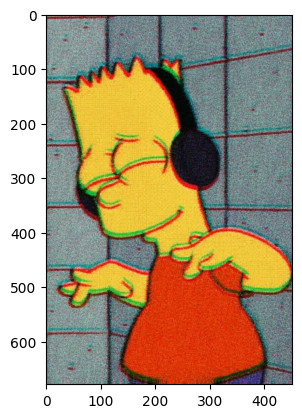

In [156]:
img = cv2.imread("happy_test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

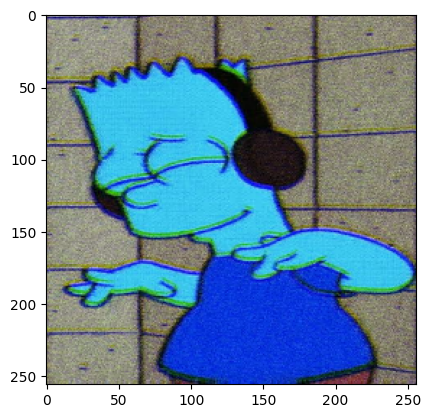

In [157]:
# resize image for CNN
resized = tf.image.resize(img, (256, 256))
plt.imshow(resized.numpy().astype(int))

In [158]:
yhat = model.predict(np.expand_dims(resized/255, 0))
if yhat > 0.5:
    print('Predicted class is Sad' + "  yhat is  " + str(yhat))
else:
    print("Predicted class is Happy"  + "  yhat is  " + str(yhat))

1/1 [==============================] - 0s 48ms/step
Predicted class is Happy  yhat is  [[0.02412969]]


## Save Model

In [159]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models', 'happysadmodel.keras'))
new_model = load_model(os.path.join('models', 'happysadmodel.keras'))


In [160]:
new_model.predict(np.expand_dims(resized/255, 0))

1/1 [==============================] - 0s 176ms/step


array([[0.02412969]], dtype=float32)